# Preliminary results

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [88]:
# Almost identical hyper-parameters
model_data = {
    'model': [
        "LEGnet", "TISnet", "mamba2", "mamba",
        "LSTM", "GRU", "Transformer", "xLSTM",
        "CNN", "MLP", "MLP (freq)", 
        "RFR - paper (freq)"
    ],
    'path': [
        "binary/LEGnet/3_LEGnet", "binary/TISnet/3_TISnet",
        "binary/mamba2/2_mamba2", "binary/mamba2/3_mamba",
        "binary/lstm/1_lstm", "binary/gru/4_gru",
        "binary/transformer/1_transformer", "binary/xlstm/1_xlstm",
        "binary/cnn/1_cnn", "binary/baseline/3_baseline",
        "binary/baseline/2_baseline_freq", "Reference (Hernandez‑Alias et al. - RF)"
    ],
    'val AUC': [
        0.70593376, 0.66436466,
        0.6639333, 0.65858888, 0.64964371, 0.6787677,
        0.68218919, 0.6914775, 0.66007905, 0.6181192,
        0.73859899, 0.643167409
    ],
    
    'Training time (min.)': [
        11.6899, 48.6015, 2.394, 0.4572,
        2.9778, 5.657, 14.9869, 39.532, 0.6934, 1.464, 14.1391, np.nan
    ],
    '# Parameters': [
        4564189, 60749,
        np.nan, 35196, 833401, 629625,
        129953, 68081, 70249, 11095801, 19177, np.nan
    ]
}

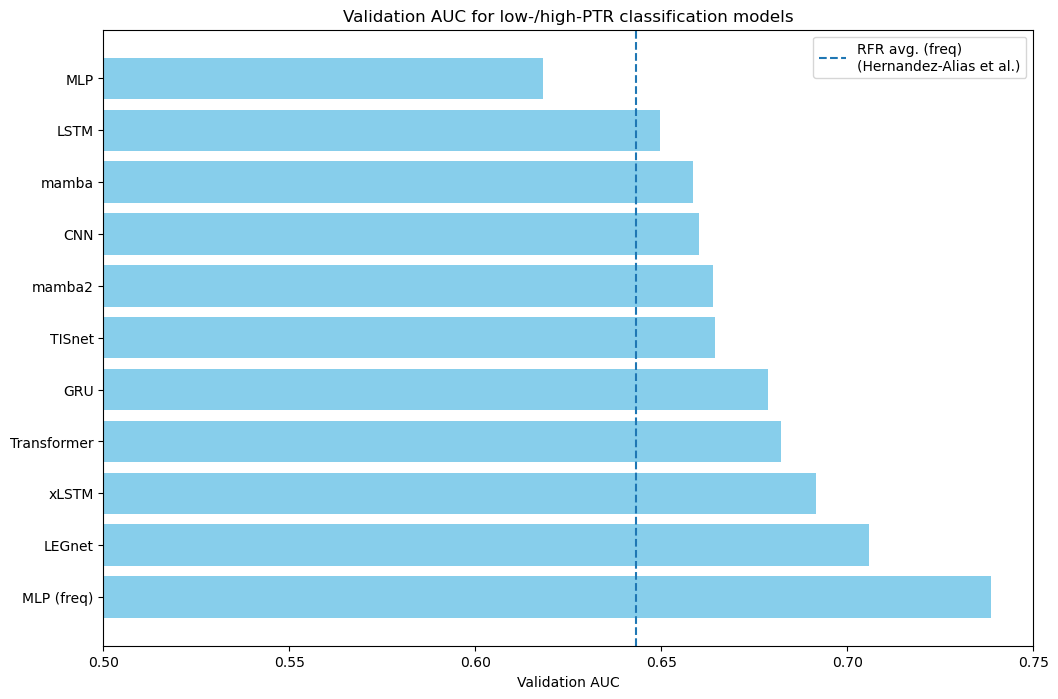

In [142]:
# Plotting the val AUC values for each model including the reference model
df_plot = pd.DataFrame(model_data)
df_plot.index = df_plot.model
df_plot = df_plot.drop("RFR - paper (freq)")
df_plot.sort_values(by="val AUC", inplace=True)

plt.figure(figsize=(12, 8))
plt.barh(df_plot.index, df_plot['val AUC'], color='skyblue')
plt.xlabel("Validation AUC")
plt.title("Validation AUC for low-/high-PTR classification models")
plt.xlim(0.5, 0.75)
plt.axvline(0.643167409, linestyle="dashed", label='RFR avg. (freq)\n(Hernandez-Alias et al.)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.legend()
plt.show()

In [138]:
df = pd.DataFrame(model_data)
df.sort_values(by="val AUC", ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [139]:
df.drop("path", axis=1, inplace=True)

In [140]:
df

,model,val AUC,Training time (min.),# Parameters
0,MLP,0.618119,1.4640,11095801.0
1,RFR - paper (freq),0.643167,NaN,NaN
2,LSTM,0.649644,2.9778,833401.0
3,mamba,0.658589,0.4572,35196.0
4,CNN,0.660079,0.6934,70249.0
5,mamba2,0.663933,2.3940,NaN
6,TISnet,0.664365,48.6015,60749.0
7,GRU,0.678768,5.6570,629625.0
8,Transformer,0.682189,14.9869,129953.0
9,xLSTM,0.691477,39.5320,68081.0


In [141]:
styled_df = (
    df.style
    .background_gradient(subset=['val AUC'], cmap='Greens')  # Color scale for 'val AUC'
    .background_gradient(subset=['Training time (min.)'], cmap='Reds')  # Color scale for 'Training time'
    .background_gradient(subset=['# Parameters'], cmap='Reds')  # Color scale for '# Parameters'
    .format(precision=4)
)

# Display the styled DataFrame (for example, in Jupyter Notebook)
styled_df

,model,val AUC,Training time (min.),# Parameters
0,MLP,0.6181,1.4640,11095801.0000
1,RFR - paper (freq),0.6432,nan,nan
2,LSTM,0.6496,2.9778,833401.0000
3,mamba,0.6586,0.4572,35196.0000
4,CNN,0.6601,0.6934,70249.0000
5,mamba2,0.6639,2.3940,nan
6,TISnet,0.6644,48.6015,60749.0000
7,GRU,0.6788,5.6570,629625.0000
8,Transformer,0.6822,14.9869,129953.0000
9,xLSTM,0.6915,39.5320,68081.0000
